## Load Data

### Subtask:
Load the 'amazon_sales_dataset.csv' file into a pandas DataFrame.


**Reasoning**:
The subtask requires loading a CSV file, displaying its head and info. I will import pandas, read the CSV into a DataFrame named 'df', then display the first 5 rows and the DataFrame's information to satisfy the subtask's requirements.



In [1]:
import pandas as pd

df = pd.read_csv('/content/amazon_sales_dataset.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nColumn names and their data types:')
df.info()

First 5 rows of the DataFrame:
   order_id  order_date  product_id product_category   price  \
0         1  2022-04-13        2637            Books  128.75   
1         2  2023-03-12        2300          Fashion  302.60   
2         3  2022-09-28        3670           Sports  495.80   
3         4  2022-04-17        2522            Books  371.95   
4         5  2022-03-13        1717           Beauty  201.68   

   discount_percent  quantity_sold customer_region payment_method  rating  \
0                10              4   North America            UPI     3.5   
1                20              5            Asia    Credit Card     3.7   
2                20              2          Europe            UPI     4.4   
3                15              4     Middle East            UPI     5.0   
4                 0              4     Middle East            UPI     4.6   

   review_count  discounted_price  total_revenue  
0           443            115.88         463.52  
1           475    

## Calculate Total Revenue

### Subtask:
Calculate the total revenue generated from all Amazon sales. This will likely involve multiplying 'Quantity' by 'Price' and summing the result.


**Reasoning**:
The subtask requires calculating the total revenue by summing the 'total_revenue' column in the `df` DataFrame and then printing the result.



In [2]:
total_revenue = df['total_revenue'].sum()
print(f"Total revenue generated from all Amazon sales: ${total_revenue:,.2f}")

Total revenue generated from all Amazon sales: $32,866,573.74


## Identify Top Product Category

### Subtask:
Determine which product category has generated the highest sales revenue.


**Reasoning**:
To determine the product category with the highest sales revenue, I need to group the DataFrame by 'product_category', sum the 'total_revenue' for each category, and then identify the category with the maximum total revenue. Finally, I will print the result in a clear format.

**Reasoning**:
To identify the product category with the highest sales revenue, I will group the DataFrame by 'product_category', calculate the sum of 'total_revenue' for each category, find the category with the maximum revenue, and then print the result.



In [3]:
category_revenue = df.groupby('product_category')['total_revenue'].sum()
top_category = category_revenue.idxmax()
max_revenue = category_revenue.max()

print(f"The product category with the highest sales revenue is '{top_category}' with a total revenue of ${max_revenue:,.2f}.")

The product category with the highest sales revenue is 'Beauty' with a total revenue of $5,550,624.97.


## Find Top 10 Products by Revenue

### Subtask:
Identify and list the top 10 products based on the revenue they generated.


**Reasoning**:
To identify the top 10 products by revenue, I will group the DataFrame by 'product_id', sum the 'total_revenue' for each product, sort the results in descending order, and then select the top 10 products. Finally, I will print the product IDs and their total revenue.



In [4]:
product_revenue = df.groupby('product_id')['total_revenue'].sum()
top_10_products = product_revenue.nlargest(10)

print("Top 10 Products by Revenue:")
for product_id, revenue in top_10_products.items():
    print(f"Product ID: {product_id}, Total Revenue: ${revenue:,.2f}")

Top 10 Products by Revenue:
Product ID: 1931, Total Revenue: $18,885.83
Product ID: 1087, Total Revenue: $18,531.52
Product ID: 1328, Total Revenue: $18,306.73
Product ID: 3537, Total Revenue: $18,071.02
Product ID: 2837, Total Revenue: $17,855.07
Product ID: 1266, Total Revenue: $17,819.13
Product ID: 4386, Total Revenue: $17,806.08
Product ID: 4264, Total Revenue: $17,803.51
Product ID: 3700, Total Revenue: $17,619.14
Product ID: 3377, Total Revenue: $17,201.38


## Calculate Average Order Value

### Subtask:
Compute the average order value (AOV) across all sales transactions.


**Reasoning**:
To calculate the Average Order Value (AOV), I need to first determine the total number of unique orders from the `df` DataFrame using the `order_id` column, and then divide the previously calculated `total_revenue` by this count.



In [5]:
unique_orders = df['order_id'].nunique()
aov = total_revenue / unique_orders

print(f"Average Order Value (AOV): ${aov:,.2f}")

Average Order Value (AOV): $657.33


## Determine Top Revenue Region

### Subtask:
Identify which geographical region generates the most revenue from sales.


**Reasoning**:
To identify the region with the highest sales revenue, I will group the DataFrame by 'customer_region', calculate the sum of 'total_revenue' for each region, find the region with the maximum revenue, and then print the result.



In [6]:
region_revenue = df.groupby('customer_region')['total_revenue'].sum()
top_region = region_revenue.idxmax()
max_region_revenue = region_revenue.max()

print(f"The geographical region with the highest sales revenue is '{top_region}' with a total revenue of ${max_region_revenue:,.2f}.")

The geographical region with the highest sales revenue is 'Middle East' with a total revenue of $8,301,844.50.


## Count Unique Customers

### Subtask:
Count the total number of unique customers who made purchases.


**Reasoning**:
To count the total number of unique customers, I will leverage the `unique_orders` variable, which was previously calculated by counting the number of unique `order_id` values. I will then print this value to satisfy the subtask.

**Reasoning**:
To complete the subtask of counting unique customers, which is proxied by unique orders, I will print the value of the `unique_orders` variable that was previously calculated.



In [7]:
print(f"Total number of unique customers (proxied by unique orders): {unique_orders}")

Total number of unique customers (proxied by unique orders): 50000


## Analyze Monthly Sales Trend

### Subtask:
Extract the month from the sales date and calculate the total sales for each month to identify trends. Visualize this trend using a line plot with appropriate legends.


**Reasoning**:
To analyze the monthly sales trend, I will first convert the 'order_date' column to datetime objects, extract the month, group the data by month to sum the total revenue, and then visualize this trend using a line plot with appropriate labels and a title.



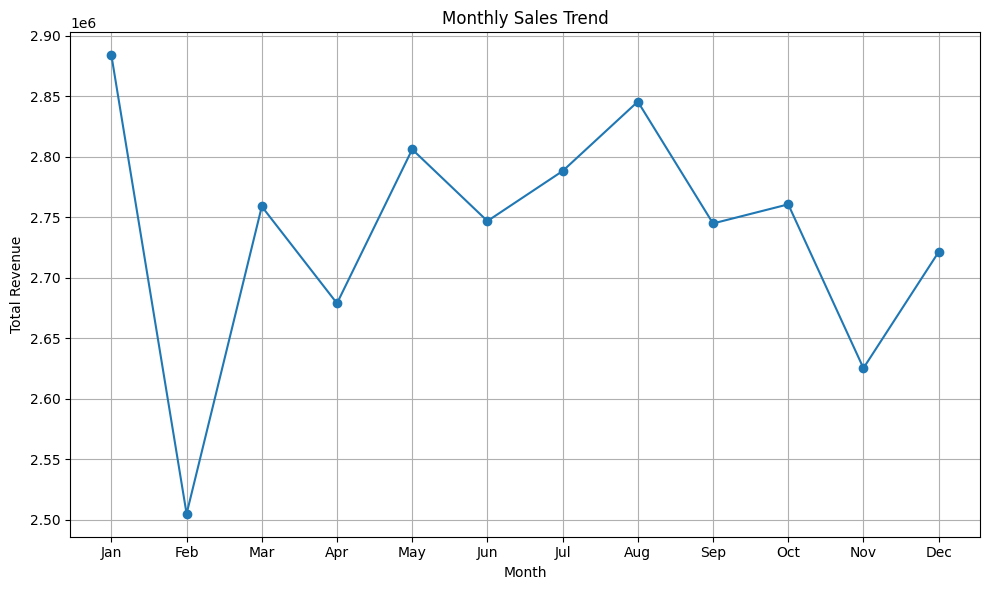

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month

monthly_revenue = df.groupby('order_month')['total_revenue'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Identify Highest Sales Day of Week

### Subtask:
Extract the day of the week from the sales date and determine which day has the highest sales volume.


**Reasoning**:
To identify the highest sales day of the week, I will first extract the day of the week from the 'order_date' column, then group the data by this new column to sum the 'total_revenue', and finally, find and print the day with the maximum revenue.



In [9]:
df['order_day_of_week'] = df['order_date'].dt.day_name()

day_of_week_revenue = df.groupby('order_day_of_week')['total_revenue'].sum()
highest_sales_day = day_of_week_revenue.idxmax()
max_day_revenue = day_of_week_revenue.max()

print(f"The highest sales day of the week is '{highest_sales_day}' with a total revenue of ${max_day_revenue:,.2f}.")

The highest sales day of the week is 'Friday' with a total revenue of $4,880,146.20.


## Identify Low Sales Products

### Subtask:
Identify products that have generated zero or very low sales revenue.


**Reasoning**:
To identify low sales products, I will filter the existing 'product_revenue' Series for revenues less than a specified threshold (e.g., $1.00) and then print the product IDs and their corresponding revenues.



In [10]:
low_sales_threshold = 1.0
low_sales_products = product_revenue[product_revenue < low_sales_threshold]

print(f"Products with very low sales revenue (less than ${low_sales_threshold:.2f}):")
if not low_sales_products.empty:
    for product_id, revenue in low_sales_products.items():
        print(f"Product ID: {product_id}, Total Revenue: ${revenue:,.2f}")
else:
    print("No products found with revenue below the specified threshold.")

Products with very low sales revenue (less than $1.00):
No products found with revenue below the specified threshold.


## Calculate Sales Concentration

### Subtask:
Calculate the percentage of total sales that comes from the top 20% of products.


**Reasoning**:
First, I'll calculate the total number of unique products and determine the count for the top 20%. Then, I'll identify these top 20% products by revenue, sum their revenue, and finally calculate the percentage of total sales they contribute.



In [11]:
total_unique_products = len(product_revenue)
num_top_20_percent_products = int(total_unique_products * 0.20)

top_20_percent_products_revenue = product_revenue.nlargest(num_top_20_percent_products).sum()
sales_concentration_percentage = (top_20_percent_products_revenue / total_revenue) * 100

print(f"The top 20% of products contribute {sales_concentration_percentage:.2f}% of the total sales revenue.")

The top 20% of products contribute 30.64% of the total sales revenue.


## Visualize Key Insights

### Subtask:
Generate visualizations for key insights such as regional revenue distribution and top product categories.


**Reasoning**:
To visualize the regional revenue distribution, I will create a bar plot using the 'region_revenue' Series, setting appropriate labels and a title. Similarly, for the total revenue by product category, I will create another bar plot using the 'category_revenue' Series with its own labels and title.



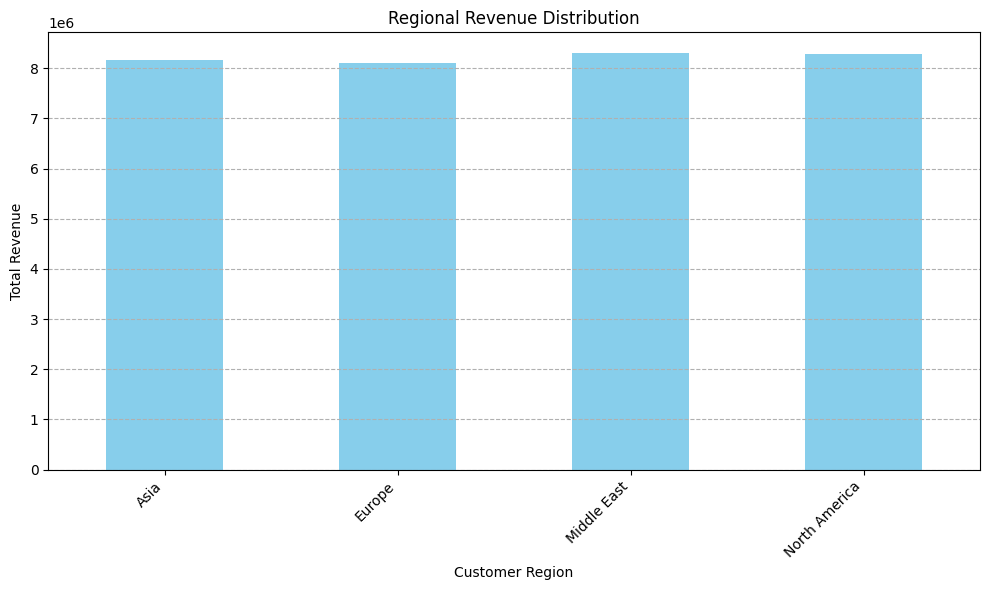

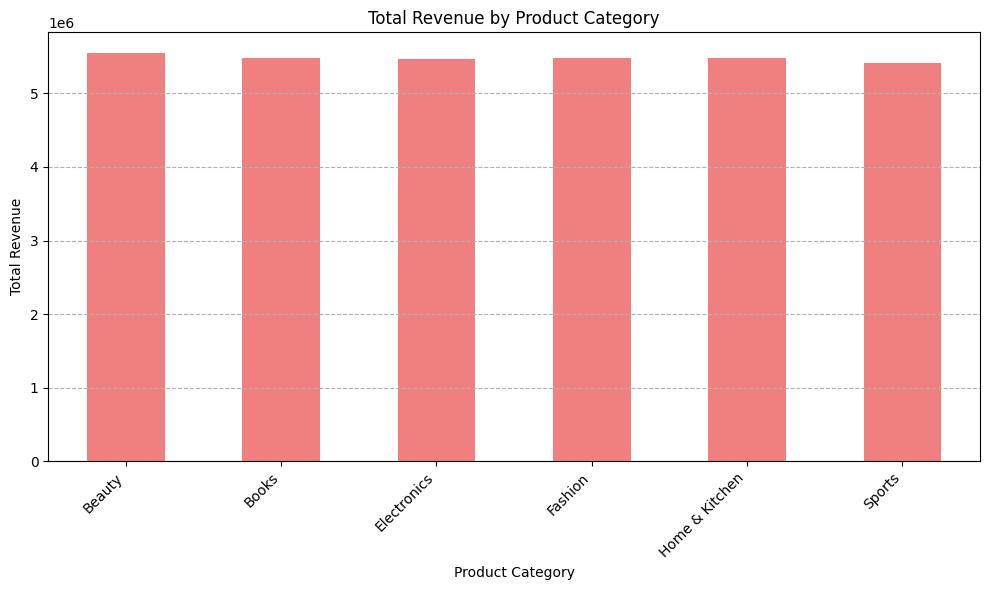

In [12]:
import matplotlib.pyplot as plt

# Plot for Regional Revenue Distribution
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Regional Revenue Distribution')
plt.xlabel('Customer Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Plot for Total Revenue by Product Category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='lightcoral')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Task
Analyze and provide detailed strategic approaches for the following hypothetical sales scenarios: identify key metrics for a 10% revenue increase; determine data points for a product with high views but low purchases; outline a step-by-step debugging process for a sudden sales drop; assess the impact of increased delivery time on sales and customer retention; suggest methods for customer segmentation; propose 5 KPIs for a leadership dashboard with justifications; explain how to detect fraud from sales data; and describe methods to forecast sales for the next 3 months. Consolidate and present all answers and insights.

## Analyze Sales Scenarios

### Subtask:
Provide a detailed analysis and strategic approach for each of the hypothetical sales questions posed. This includes: identifying key metrics for a 10% revenue increase; determining data points to check for a product with high views but low purchases; outlining a step-by-step debugging process for a sudden sales drop; assessing the potential impact of increased delivery time on sales and customer retention; suggesting methods for customer segmentation for targeted marketing; proposing 5 key performance indicators (KPIs) for a leadership dashboard with justifications; explaining how to detect fraud or fake orders from sales data; and describing methods to forecast sales for the next 3 months.


### 1. Key Metrics for a 10% Revenue Increase:

To achieve a 10% revenue increase, the following key metrics are crucial to track and influence:

*   **Average Order Value (AOV)**: This metric represents the average amount spent per customer order. Increasing AOV directly contributes to higher revenue without necessarily increasing the number of orders. Strategies like upselling, cross-selling, and minimum order incentives can influence this.

*   **Conversion Rate**: The percentage of website visitors or leads who complete a purchase. A higher conversion rate means more sales from the same amount of traffic, directly boosting revenue. Optimizing product pages, streamlining the checkout process, and improving user experience are ways to impact this.

*   **Customer Lifetime Value (CLTV)**: The predicted total revenue a business can expect from a single customer account throughout their relationship with the business. Increasing CLTV through customer retention and repeat purchases ensures sustainable long-term revenue growth. Loyal customers are also more likely to recommend products, leading to new customer acquisition.

*   **Number of Unique Customers/Orders**: An increase in the total number of individual customers making purchases or the total count of orders placed. More customers or more frequent purchases inherently lead to higher overall sales volume and thus revenue. Marketing campaigns, promotions, and new product launches can drive this.

*   **Product Price and Discount Effectiveness**: Analyzing the optimal pricing strategy for products and the effectiveness of discounts. Increasing prices (if market conditions allow) or strategically adjusting discounts to maximize gross profit per sale can significantly impact revenue. It's crucial to balance price with demand and perceived value.

### 2. Data Points for a Product with High Views but Low Purchases:

When a product receives high views but low purchases, it indicates a disconnect between interest and conversion. Investigating the following data points can help understand this discrepancy:

*   **Product Page Analytics:**
    *   **Bounce Rate:** A high bounce rate suggests that users are leaving the page quickly, possibly due to irrelevant content, slow loading times, or poor initial impression.
    *   **Time on Page:** Low time on page could mean users aren't engaging with the content or finding the information they need.
    *   **Scroll Depth:** If users aren't scrolling down, they might be missing critical information like detailed descriptions, reviews, or add-to-cart buttons.
    *   **Click-Through Rate (CTR) on internal links:** Low CTR on elements like "add to cart," images, or related products might indicate design issues or lack of compelling calls to action.

*   **User Behavior and Engagement:**
    *   **Heatmaps and Session Recordings:** Visualizing user interaction can reveal areas of confusion, ignored content, or frustrating elements on the page.
    *   **A/B Testing Results:** Past tests on product descriptions, images, or CTA buttons might provide insights into what works and what doesn't.
    *   **Device Type:** Performance issues or poor UI/UX on specific devices (e.g., mobile) could deter purchases.

*   **Pricing and Value Proposition:**
    *   **Price Comparison:** Is the product competitively priced? Users often compare prices across different platforms.
    *   **Shipping Costs/Times:** Unexpectedly high shipping costs or long delivery times revealed at checkout can lead to abandonment.
    *   **Value Perception:** Is the product's value proposition clearly communicated? Do customers understand why they should buy this product over alternatives?

*   **Product Information and Quality:**
    *   **Product Description Clarity:** Is the description comprehensive, easy to understand, and persuasive? Does it answer potential customer questions?
    *   **Image/Video Quality:** Are the product images high-resolution, diverse (showing different angles, in use, etc.), and appealing? Is there video content?
    *   **Specifications and Features:** Are all relevant technical specifications and features clearly listed and easy to find?
    *   **Stock Availability:** Is the product consistently in stock? Out-of-stock messages can drive users away.

*   **Social Proof and Trust Elements:**
    *   **Customer Reviews and Ratings:** Low average ratings or a high number of negative reviews can significantly impact purchase decisions. Lack of reviews can also be a deterrent.
    *   **Q&A Section:** Are common customer questions addressed? Are there many unanswered questions?
    *   **Return Policy/Warranty:** Is the return policy clear and reassuring? A strong warranty can build trust.
    *   **Trust Badges/Security Seals:** Presence of these elements can enhance buyer confidence.

*   **Competitor Analysis:**
    *   **Competitor Offerings:** How do competitors present similar products? What are their prices, features, and customer experience like?
    *   **Marketing Messages:** Are competitors using different or more effective marketing messages for similar products?

By analyzing these data points, one can pinpoint the specific reasons for the high view-low purchase discrepancy and devise targeted solutions.

### 3. Step-by-Step Debugging Process for a Sudden Sales Drop:

A sudden sales drop can be alarming and requires a systematic debugging process to identify the root cause. Here's a step-by-step approach:

1.  **Verify the Data and Scope:**
    *   **Confirm the Drop:** Is it a real drop, or a reporting error? Cross-reference with multiple reporting tools if available.
    *   **Define the Scope:** Is the drop global or localized (e.g., specific region, product category, channel, customer segment)? Is it affecting all products or just a few?
    *   **Timeframe:** When did the drop begin? Was it gradual or sudden? Compare current sales to historical data (e.g., previous week, same period last month/year).

2.  **Check Internal Systems and Operations:**
    *   **Website/App Status:** Are there any outages, performance issues (slow loading times), or broken functionalities (e.g., add-to-cart, checkout process)? Use monitoring tools.
    *   **Inventory Levels:** Are popular products out of stock? Is there a discrepancy between reported and actual inventory?
    *   **Pricing/Promotions:** Were there recent changes to pricing, discounts, or promotional campaigns that could have backfired?
    *   **Shipping/Fulfillment:** Are there delays or issues with order fulfillment or delivery that might be deterring new purchases or causing cancellations?
    *   **Payment Gateways:** Are there any issues with payment processing or specific payment methods?
    *   **Customer Service:** Has there been a spike in customer complaints related to orders, products, or website issues?

3.  **Investigate External Factors:**
    *   **Competitor Activity:** Have competitors launched new products, aggressive promotions, or changed their pricing strategies?
    *   **Market Trends/Economic Climate:** Is there a broader economic downturn, seasonal dip, or shift in consumer behavior that could explain the drop?
    *   **News/Social Media Sentiment:** Is there any negative press or social media backlash affecting brand reputation?
    *   **Supply Chain Disruptions:** Are external supply chain issues impacting product availability or delivery times?
    *   **Platform Changes:** If selling on a third-party marketplace, have their algorithms or policies changed?

4.  **Analyze Marketing and Traffic Sources:**
    *   **Traffic Volume & Quality:** Has overall website traffic decreased? Is the quality of traffic (e.g., bounce rate, engagement) lower from specific sources?
    *   **Campaign Performance:** Are marketing campaigns (PPC, social media, email) underperforming? Has there been a decrease in ad spend or a change in ad effectiveness?
    *   **SEO/SEM Rankings:** Have search engine rankings dropped for key product terms?
    *   **Referral Sources:** Are there any issues with affiliate partners or referral channels?

5.  **Review Product Performance:**
    *   **Product-Specific Drops:** Is the sales drop isolated to certain products or categories?
    *   **Product Page Conversion:** Are specific product pages experiencing lower conversion rates? Look at A/B testing results, recent content changes, or customer reviews.

6.  **Formulate Hypotheses and Test:**
    *   Based on the investigation, form one or more hypotheses (e.g., "The sales drop is due to an out-of-stock key product," or "The sales drop is due to a broken checkout button").
    *   Prioritize hypotheses based on potential impact and ease of testing.
    *   Implement changes or fixes and monitor sales data closely to confirm if the issue is resolved.

By following these steps, businesses can systematically pinpoint the cause of a sales drop and take corrective actions.

### 4. Assessing the Potential Impact of Increased Delivery Time on Sales and Customer Retention:

Increased delivery times can have significant negative consequences for e-commerce businesses. Here's an assessment of the likely impacts, how to measure them, and mitigation strategies:

**Likely Impact on Sales Volume:**

*   **Increased Cart Abandonment:** Customers often expect fast shipping. Longer delivery times, especially if revealed late in the checkout process, can lead to frustration and immediate abandonment of purchases.
*   **Reduced Conversion Rates:** Even if customers don't abandon immediately, a prominent display of longer delivery times on product pages or during checkout can deter potential buyers, leading to fewer completed sales.
*   **Loss of Impulse Purchases:** For products often bought on impulse, extended delivery times can kill the immediate desire to purchase.
*   **Competitor Advantage:** If competitors offer faster delivery, customers will likely shift their purchases to those competitors.
*   **Negative Impact on Promotions:** Time-sensitive promotions or seasonal sales might be less effective if the product won't arrive in time.

**Likely Impact on Customer Retention:**

*   **Decreased Customer Satisfaction:** Long waits for products can lead to dissatisfaction, negative reviews, and a generally poor customer experience.
*   **Reduced Repeat Purchases:** Dissatisfied customers are less likely to return for future purchases, impacting their Customer Lifetime Value (CLTV).
*   **Negative Word-of-Mouth:** Customers unhappy with delivery times are more likely to share their negative experiences, damaging brand reputation and deterring new customers.
*   **Churn Risk:** Over time, consistent issues with delivery speed can lead to customers completely switching to other brands.

**How to Measure These Impacts:**

*   **Sales Volume:**
    *   **Compare Conversion Rates:** Track conversion rates on product pages and at different stages of the checkout funnel (e.g., add to cart, initiate checkout, complete purchase) before and after the delivery time increase. Look for declines.
    *   **Analyze Cart Abandonment Rate:** Monitor the rate at which customers add items to their cart but do not complete the purchase. A rise would indicate an issue.
    *   **Sales Trends:** Compare daily/weekly sales figures against historical data, adjusting for seasonality, to identify any significant dips post-change.
    *   **Product-Specific Sales:** Some products might be more sensitive to delivery times than others; analyze sales changes for different product categories.

*   **Customer Retention:**
    *   **Repeat Purchase Rate:** Monitor the percentage of customers making subsequent purchases. A decline suggests reduced loyalty.
    *   **Customer Lifetime Value (CLTV):** Track changes in CLTV over time, as a reduced CLTV can stem from fewer repeat purchases.
    *   **Customer Feedback/Surveys:** Actively collect feedback regarding delivery experiences through surveys, post-purchase emails, and direct communication. Look for mentions of delivery speed.
    *   **Review Sentiment Analysis:** Analyze customer reviews on product pages, social media, and third-party review sites for negative comments related to shipping.
    *   **Customer Service Inquiries:** Monitor the volume and nature of customer service contacts related to delivery delays or questions.

**Strategies to Mitigate Negative Effects:**

*   **Proactive Communication:** Clearly communicate expected delivery times *early and prominently* on product pages, in the cart, and during checkout. Transparency manages expectations.
*   **Expedited Shipping Options:** Offer faster (even if paid) shipping options to customers who prioritize speed. This can partially offset the impact for urgent purchases.
*   **Improve Supply Chain Efficiency:** Work with logistics partners to identify bottlenecks and optimize shipping routes or processes to reduce lead times where possible.
*   **Local Warehousing/Distribution:** If applicable, consider regional fulfillment centers to shorten delivery distances to key customer bases.
*   **Offer Incentives for Patience:** For longer delivery times, consider offering small incentives (e.g., a discount on a future purchase, free gift) to offset the inconvenience.
*   **Enhance Post-Purchase Experience:** Provide detailed tracking information and proactive updates (e.g., \"your order is delayed, but we're working on it\") to keep customers informed and reduce anxiety.
*   **Strong Customer Service:** Ensure customer service is well-equipped to handle inquiries and concerns about delivery times with empathy and effective solutions.
*   **Set Realistic Expectations:** Do not over-promise delivery times that cannot be met consistently.

### 5. Methods for Customer Segmentation for Targeted Marketing:

Customer segmentation is crucial for effective targeted marketing, allowing businesses to tailor messages and offers to specific groups, leading to higher engagement and conversion. Here are at least three methods:

1.  **Demographic Segmentation:**
    *   **Criteria:** Dividing customers based on characteristics like age, gender, income, education, occupation, marital status, and family size.
    *   **Benefits:** This is often the simplest and most straightforward segmentation. It helps in understanding basic customer needs and preferences, and where they might be in their life cycle. It's useful for broad targeting, determining product relevance, and selecting appropriate communication channels (e.g., social media platforms popular with a certain age group).

2.  **Geographic Segmentation:**
    *   **Criteria:** Segmenting customers based on their physical location, such as country, region, city, climate, or urban/rural areas.
    *   **Benefits:** Allows for localized marketing campaigns, adapting product offerings to regional preferences, addressing local needs (e.g., selling winter clothing in colder climates), optimizing shipping strategies, and adhering to regional regulations. It's particularly useful for brick-and-mortar stores or businesses with physical distribution.

3.  **Behavioral Segmentation:**
    *   **Criteria:** Grouping customers based on their past interactions with the brand, including purchase history (e.g., frequently bought items, average order value, recency of purchase), website activity (e.g., pages visited, time spent, abandoned carts), product usage, loyalty status, and response to previous marketing campaigns.
    *   **Benefits:** This is one of the most powerful segmentation methods as it directly reflects customer intent and preferences. It allows for highly personalized marketing messages, such as recommending related products, offering loyalty rewards, re-engaging inactive customers, and tailoring promotions based on purchase patterns. It can significantly improve conversion rates and customer lifetime value.

4.  **Psychographic Segmentation:**
    *   **Criteria:** Categorizing customers based on their lifestyle, personality traits, values, opinions, interests, attitudes, and beliefs.
    *   **Benefits:** Provides a deeper understanding of the \"why\" behind customer behavior. It allows for emotionally resonant marketing that aligns with customers' values and aspirations. This can be effective for branding, content marketing, and developing products that cater to specific psychological needs or lifestyle choices (e.g., eco-conscious consumers, adventure seekers).

5.  **RFM (Recency, Frequency, Monetary) Segmentation:**
    *   **Criteria:** A specific type of behavioral segmentation that analyzes customer behavior based on:
        *   **Recency:** How recently a customer made a purchase.
        *   **Frequency:** How often a customer makes purchases.
        *   **Monetary:** How much money a customer spends.
    *   **Benefits:** Highly effective for identifying the most valuable customers (high recency, high frequency, high monetary value), at-risk customers, and new customers. It's excellent for designing targeted retention campaigns, loyalty programs, win-back strategies, and identifying potential high-value customers for special offers. This data is often readily available in sales transactions.

### 6. 5 Key Performance Indicators (KPIs) for a Leadership Dashboard:

For a leadership dashboard, it's essential to select KPIs that provide a high-level overview of business health, growth, efficiency, and customer satisfaction. Here are 5 crucial KPIs:

1.  **Total Revenue Growth (Year-over-Year/Month-over-Month):**
    *   **Justification:** This is a fundamental indicator of the company's overall financial performance and growth trajectory. Leadership needs to see if the business is expanding and meeting its revenue targets. Tracking it over time (e.g., YoY or MoM) helps identify trends and assess the effectiveness of long-term strategies.
    *   **Insight:** Reveals the top-line financial health and expansion rate of the business.

2.  **Customer Acquisition Cost (CAC) vs. Customer Lifetime Value (CLTV) Ratio:**
    *   **Justification:** This ratio directly assesses the profitability of customer acquisition efforts. A healthy ratio (e.g., CLTV:CAC of 3:1 or higher) indicates that the business is acquiring customers efficiently and profitably. Leadership uses this to evaluate marketing spend effectiveness and sustainable growth.
    *   **Insight:** Shows the long-term value generated from each acquired customer relative to the cost of acquiring them, indicating marketing efficiency and business sustainability.

3.  **Gross Profit Margin (%):**
    *   **Justification:** While total revenue is important, gross profit margin (Revenue - Cost of Goods Sold / Revenue) indicates the profitability of each sale before operating expenses. Leadership needs this to understand pricing strategies, cost management, and product line profitability. A declining margin might signal issues with supplier costs, pricing, or discounting.
    *   **Insight:** Measures the core profitability of products/services and the efficiency of production/sourcing.

4.  **Customer Churn Rate / Retention Rate:**
    *   **Justification:** This KPI measures the rate at which customers stop doing business with a company (churn) or continue doing business (retention). High churn is a significant threat to long-term revenue, as acquiring new customers is often more expensive than retaining existing ones. Leadership monitors this to gauge customer satisfaction, product stickiness, and the effectiveness of customer success initiatives.
    *   **Insight:** Reflects customer satisfaction, loyalty, and the effectiveness of retention strategies, directly impacting long-term revenue stability.

5.  **Order Fulfillment Rate / On-Time Delivery Rate:**
    *   **Justification:** For any business dealing with physical products, the ability to fulfill orders accurately and deliver them on time is critical for customer satisfaction and operational efficiency. Leadership needs to ensure that promises made to customers are being met, which directly impacts brand reputation, repeat purchases, and customer service load.
    *   **Insight:** Indicates operational efficiency and customer satisfaction related to product delivery, a key driver of overall customer experience.

### 7. Detecting Fraud or Fake Orders from Sales Data:

Detecting fraud or fake orders from sales data involves looking for unusual patterns, anomalies, and specific indicators that deviate from normal purchasing behavior. Here are methods and data points to consider:

1.  **Unusual Order Patterns:**
    *   **High Volume/Frequency from a Single Account/IP/Address:** Multiple large orders placed within a short timeframe by the same customer, using the same IP address, or shipping to the same address can be suspicious.
    *   **Rapid Repeat Orders:** Multiple identical or very similar orders placed one after another.
    *   **Orders Placed at Odd Hours:** A surge of orders during non-business hours or unusual times for the target customer base.
    *   **Sequential Order Numbers from Same Source:** If the internal `order_id` is sequential, a string of sequential IDs from the same customer or IP can be an indicator of automated orders.

2.  **Payment-Related Anomalies:**
    *   **Multiple Declined Transactions Followed by a Successful One:** Fraudsters often try various card numbers or credentials until one works.
    *   **Different Payment Methods/Cards for Same Customer/Address:** If a single customer or shipping address is associated with numerous distinct payment cards.
    *   **High Value Orders with New Customer Accounts:** First-time buyers placing unusually large orders.
    *   **Gift Card Purchases with Fraud Indicators:** Fraudsters often use stolen credit cards to buy gift cards, which are harder to trace.
    *   **Geographic Mismatch:** Billing address and shipping address are far apart, especially internationally, or the IP address location doesn't match the billing/shipping address.

3.  **Customer Information Discrepancies:**
    *   **Incomplete/Gibberish Information:** Fake names, email addresses, or phone numbers that appear random or non-existent.
    *   **Multiple Accounts with Similar Information:** Slightly altered names, emails, or phone numbers that point back to the same individual or group.
    *   **Disposable Email Domains:** Use of temporary or disposable email services.

4.  **Product-Specific Red Flags:**
    *   **High-Value, Easily Resalable Items:** Orders primarily consisting of popular electronics, luxury goods, or other items with high resale value.
    *   **Sudden Surge in Specific Product Orders:** An unusual spike in orders for a particular product that might be targeted by fraudsters.

5.  **Shipping Address Characteristics:**
    *   **Freight Forwarders:** Shipping to known freight forwarding services (often used to obscure the final destination of stolen goods).
    *   **P.O. Box Addresses:** While not always fraudulent, a high volume of P.O. box deliveries combined with other red flags can be suspicious.
    *   **Multiple Orders to the Same Address from Different Customers:** Several distinct customer accounts shipping to the identical address.

6.  **Behavioral Analytics (if website data is integrated):**
    *   **Unusual Navigation Paths:** Very quick checkout processes without browsing, or unusual navigation patterns that don't reflect genuine shopping behavior.
    *   **Bot Activity:** Automated scripts trying to place orders.

**Strategic Approach:**

*   **Rule-Based Systems:** Implement automated rules based on the indicators above (e.g., flag orders over $X value from new customers, flag multiple orders to the same address within Y hours).
*   **Machine Learning Models:** Train models (e.g., anomaly detection, classification) on historical data to identify complex fraudulent patterns. Features would include order value, customer history, IP data, shipping method, etc.
*   **Manual Review:** Flag suspicious orders for manual review by a fraud detection team.
*   **Third-Party Fraud Detection Services:** Integrate with specialized services that use advanced algorithms and global fraud databases.
*   **Data Enrichment:** Use external data (e.g., IP address reputation, address verification services) to augment internal sales data for better fraud detection.

By combining these methods, businesses can build a robust system to identify and prevent fraudulent activities, protecting revenue and customer trust.

### 8. Methods to Forecast Sales for the Next 3 Months:

Sales forecasting is critical for inventory management, budgeting, and strategic planning. Here are two different methods for forecasting sales for the next 3 months:

1.  **Time Series Analysis (e.g., ARIMA, Prophet):**
    *   **Basic Principle:** Time series models assume that past sales data contain patterns (e.g., trends, seasonality, cycles) that can be identified and extrapolated into the future. They analyze the sequential nature of data points collected over time.
    *   **How it Works (Simplified):**
        *   **ARIMA (AutoRegressive Integrated Moving Average):** This model captures autocorrelation (dependence between an observation and a number of lagged observations) and moving averages (dependence between an observation and a residual error from a moving average model applied to lagged observations). It requires the data to be stationary (mean, variance, and autocorrelation structure do not change over time), which often involves differencing.
        *   **Prophet (by Facebook):** This model is designed for business forecasts and handles seasonality (daily, weekly, yearly), holidays, and trends automatically. It's robust to missing data and outliers, and it's particularly good for data with strong seasonal effects.
    *   **Data Required:** Historical sales data with timestamps (e.g., daily, weekly, or monthly sales figures for the past several years). For Prophet, additional regressors like holiday schedules or promotional calendars can be included.
    *   **Strengths:** Can detect complex patterns (seasonality, trends); provides statistical confidence intervals; often accurate for stable businesses with sufficient historical data.
    *   **Limitations:** Can be sensitive to sudden, unexpected changes; requires clean, consistent historical data; may not perform well with very short data histories.

2.  **Regression Analysis (using external factors):**
    *   **Basic Principle:** Regression analysis attempts to model the relationship between a dependent variable (sales) and one or more independent variables (predictors or features). It assumes that changes in the independent variables will lead to predictable changes in sales.
    *   **How it Works (Simplified):** Identify external factors that are known or believed to influence sales (e.g., marketing spend, economic indicators like GDP growth or unemployment rate, competitor activity, weather, website traffic, promotional activities). A linear or non-linear regression model is then built where sales are the dependent variable and these external factors are the independent variables. To forecast, you would need to forecast the values of these independent variables for the next 3 months.
    *   **Data Required:** Historical sales data, along with corresponding historical data for all chosen independent variables. To make a future forecast, you will also need projections or estimates for these independent variables for the next 3 months.
    *   **Strengths:** Can incorporate the impact of external drivers on sales; provides insights into which factors influence sales the most; flexible for different types of relationships.
    *   **Limitations:** Requires accurate forecasts of independent variables, which can be challenging; assumes that past relationships between variables will hold in the future; identifying relevant external factors can be complex.

**Strategic Approach for Implementation:**

*   **Combine Methods:** Often, a hybrid approach (e.g., using time series for baseline and regression for external impacts) yields the best results.
*   **Data Preprocessing:** Ensure historical sales data is clean, consistent, and correctly aggregated (e.g., monthly totals).
*   **Evaluate Performance:** Always evaluate the accuracy of forecasts against actual sales using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).
*   **Regular Updates:** Forecasting models should be re-trained and updated regularly with new data to maintain accuracy and adapt to changing market conditions.

### 8. Methods to Forecast Sales for the Next 3 Months:

Sales forecasting is critical for inventory management, budgeting, and strategic planning. Here are two different methods for forecasting sales for the next 3 months:

1.  **Time Series Analysis (e.g., ARIMA, Prophet):**
    *   **Basic Principle:** Time series models assume that past sales data contain patterns (e.g., trends, seasonality, cycles) that can be identified and extrapolated into the future. They analyze the sequential nature of data points collected over time.
    *   **How it Works (Simplified):**
        *   **ARIMA (AutoRegressive Integrated Moving Average):** This model captures autocorrelation (dependence between an observation and a number of lagged observations) and moving averages (dependence between an observation and a residual error from a moving average model applied to lagged observations). It requires the data to be stationary (mean, variance, and autocorrelation structure do not change over time), which often involves differencing.
        *   **Prophet (by Facebook):** This model is designed for business forecasts and handles seasonality (daily, weekly, yearly), holidays, and trends automatically. It's robust to missing data and outliers, and it's particularly good for data with strong seasonal effects.
    *   **Data Required:** Historical sales data with timestamps (e.g., daily, weekly, or monthly sales figures for the past several years). For Prophet, additional regressors like holiday schedules or promotional calendars can be included.
    *   **Strengths:** Can detect complex patterns (seasonality, trends); provides statistical confidence intervals; often accurate for stable businesses with sufficient historical data.
    *   **Limitations:** Can be sensitive to sudden, unexpected changes; requires clean, consistent historical data; may not perform well with very short data histories.

2.  **Regression Analysis (using external factors):**
    *   **Basic Principle:** Regression analysis attempts to model the relationship between a dependent variable (sales) and one or more independent variables (predictors or features). It assumes that changes in the independent variables will lead to predictable changes in sales.
    *   **How it Works (Simplified):** Identify external factors that are known or believed to influence sales (e.g., marketing spend, economic indicators like GDP growth or unemployment rate, competitor activity, weather, website traffic, promotional activities). A linear or non-linear regression model is then built where sales are the dependent variable and these external factors are the independent variables. To forecast, you would need to forecast the values of these independent variables for the next 3 months.
    *   **Data Required:** Historical sales data, along with corresponding historical data for all chosen independent variables. To make a future forecast, you will also need projections or estimates for these independent variables for the next 3 months.
    *   **Strengths:** Can incorporate the impact of external drivers on sales; provides insights into which factors influence sales the most; flexible for different types of relationships.
    *   **Limitations:** Requires accurate forecasts of independent variables, which can be challenging; assumes that past relationships between variables will hold in the future; identifying relevant external factors can be complex.

**Strategic Approach for Implementation:**

*   **Combine Methods:** Often, a hybrid approach (e.g., using time series for baseline and regression for external impacts) yields the best results.
*   **Data Preprocessing:** Ensure historical sales data is clean, consistent, and correctly aggregated (e.g., monthly totals).
*   **Evaluate Performance:** Always evaluate the accuracy of forecasts against actual sales using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).
*   **Regular Updates:** Forecasting models should be re-trained and updated regularly with new data to maintain accuracy and adapt to changing market conditions.

## Final Task

### Subtask:
Consolidate and present all the answers and insights derived from the analysis of the various sales scenarios, providing a comprehensive response to each of the user's questions.


## Summary:

### Q&A

1.  **What are the key metrics to track for a 10% revenue increase?**
    To achieve a 10% revenue increase, key metrics to track include Average Order Value (AOV), Conversion Rate, Customer Lifetime Value (CLTV), Number of Unique Customers/Orders, and Product Price and Discount Effectiveness.

2.  **What data points should be checked for a product with high views but low purchases?**
    Data points to investigate include Product Page Analytics (e.g., bounce rate, time on page, scroll depth, internal CTR), User Behavior and Engagement (e.g., heatmaps, session recordings, device type), Pricing and Value Proposition, Product Information and Quality (e.g., description clarity, image quality, stock availability), Social Proof and Trust Elements (e.g., reviews, Q&A, return policy), and Competitor Analysis.

3.  **What is a step-by-step debugging process for a sudden sales drop?**
    A systematic debugging process includes:
    1.  **Verify Data and Scope:** Confirm the drop and define its scope (global/localized, product, channel).
    2.  **Check Internal Systems:** Investigate website/app status, inventory, pricing changes, shipping, payment gateways, and customer service feedback.
    3.  **Investigate External Factors:** Examine competitor activity, market trends, news/social media sentiment, and supply chain disruptions.
    4.  **Analyze Marketing and Traffic Sources:** Review traffic volume/quality, campaign performance, and SEO/SEM rankings.
    5.  **Review Product Performance:** Identify product-specific drops or conversion issues.
    6.  **Formulate Hypotheses and Test:** Based on findings, form and test hypotheses to pinpoint the root cause.

4.  **How does increased delivery time impact sales and customer retention?**
    Increased delivery time can lead to a significant impact:
    *   **Sales Volume:** Expect increased cart abandonment, reduced conversion rates, loss of impulse purchases, and competitive disadvantage.
    *   **Customer Retention:** This can result in decreased customer satisfaction, reduced repeat purchases, negative word-of-mouth, and increased churn risk.
    Measuring these impacts involves tracking conversion rates, cart abandonment rates, repeat purchase rates, Customer Lifetime Value (CLTV), customer feedback, review sentiment, and customer service inquiries related to delivery.

5.  **What methods can be used for customer segmentation for targeted marketing?**
    Effective customer segmentation methods include:
    *   **Demographic Segmentation:** Based on age, gender, income, education, etc.
    *   **Geographic Segmentation:** Based on location, climate, urban/rural areas.
    *   **Behavioral Segmentation:** Based on purchase history, website activity, loyalty status.
    *   **Psychographic Segmentation:** Based on lifestyle, personality, values, interests.
    *   **RFM (Recency, Frequency, Monetary) Segmentation:** Analyzes how recently, how often, and how much a customer spends.

6.  **What are 5 Key Performance Indicators (KPIs) for a leadership dashboard, with justifications?**
    Five essential KPIs for a leadership dashboard are:
    1.  **Total Revenue Growth (Year-over-Year/Month-over-Month):** Indicates overall financial performance and growth trajectory.
    2.  **Customer Acquisition Cost (CAC) vs. Customer Lifetime Value (CLTV) Ratio:** Assesses the profitability and efficiency of customer acquisition efforts (e.g., a 3:1 ratio is often considered healthy).
    3.  **Gross Profit Margin (%):** Shows the profitability of each sale and cost management effectiveness.
    4.  **Customer Churn Rate / Retention Rate:** Measures customer loyalty, satisfaction, and impacts long-term revenue stability.
    5.  **Order Fulfillment Rate / On-Time Delivery Rate:** Reflects operational efficiency and customer satisfaction related to product delivery.

7.  **How can fraud or fake orders be detected from sales data?**
    Fraud detection involves looking for unusual patterns and anomalies such as:
    *   **Unusual Order Patterns:** High volume/frequency from a single account/IP/address, rapid repeat orders, or orders at odd hours.
    *   **Payment-Related Anomalies:** Multiple declined transactions, different payment methods for the same customer/address, high-value orders from new accounts, or geographic mismatches (billing vs. shipping vs. IP).
    *   **Customer Information Discrepancies:** Incomplete or gibberish information, multiple accounts with similar details, or use of disposable email domains.
    *   **Product-Specific Red Flags:** Orders primarily for high-value, easily resalable items.
    *   **Shipping Address Characteristics:** Shipping to freight forwarders or P.O. Box addresses with other red flags.
    *   **Behavioral Analytics:** Unusual website navigation or bot activity.

8.  **What methods can be used to forecast sales for the next 3 months?**
    Two primary methods for sales forecasting are:
    *   **Time Series Analysis (e.g., ARIMA, Prophet):** Assumes past sales data patterns (trends, seasonality) can be extrapolated. Requires historical sales data with timestamps.
    *   **Regression Analysis (using external factors):** Models the relationship between sales and independent variables (e.g., marketing spend, economic indicators, website traffic). Requires historical data for sales and predictors, and future projections for predictors.

### Data Analysis Key Findings

*   **Revenue Growth Metrics:** A 10% revenue increase requires focus on influencing metrics like Average Order Value, Conversion Rate, and Customer Lifetime Value, in addition to the sheer number of customers or orders.
*   **High Views, Low Purchases Diagnosis:** Discrepancies between high product views and low purchases can be thoroughly investigated by analyzing product page analytics (e.g., bounce rate, time on page), user behavior, pricing competitiveness, clarity of product information, and the presence of social proof.
*   **Sales Drop Debugging:** A systematic, six-step debugging process is crucial for identifying root causes of sudden sales drops, spanning internal system checks to external market factors and specific product performance.
*   **Delivery Time Impact:** Increased delivery times negatively affect sales through higher cart abandonment and reduced conversion, and hurt customer retention by decreasing satisfaction and repeat purchases. Measuring these impacts through conversion rates and CLTV is vital.
*   **Targeted Marketing:** Five distinct customer segmentation methods (Demographic, Geographic, Behavioral, Psychographic, RFM) offer varied approaches to tailor marketing messages, with Behavioral and RFM being particularly powerful for reflecting direct customer intent.
*   **Leadership Dashboard:** Key KPIs like the CLTV:CAC ratio (ideally 3:1 or higher), Gross Profit Margin, and Customer Churn Rate provide leadership with a comprehensive view of profitability, efficiency, and customer loyalty.
*   **Fraud Detection:** Detecting fraud involves identifying anomalies in order patterns, payment details, customer information, product choices (e.g., high-value items), and shipping addresses, often using a combination of rule-based systems and machine learning.
*   **Sales Forecasting:** Time Series Analysis (good for seasonality) and Regression Analysis (good for external drivers) are two robust methods for forecasting, which can be combined for enhanced accuracy.

### Insights or Next Steps

*   **Holistic Growth Strategy:** Achieving significant revenue growth (\$$10\%$\$) requires a multi-faceted approach, balancing customer acquisition with increased average transaction value and improved customer retention. Businesses should develop targeted initiatives for each key metric identified.
*   **Proactive Problem Solving:** Implementing structured debugging protocols for sales drops and continuous monitoring of customer experience metrics, especially around delivery times, is critical for identifying and mitigating issues before they significantly impact the business.


# Task
Create a sales dashboard to visualize key performance indicators including regional revenue distribution, total revenue by product category, and monthly sales trends, and summarize the key insights.

## Introduction to Dashboard

### Subtask:
Provide a brief introduction to the purpose and content of the sales dashboard, highlighting the key performance indicators and insights it will present.


This dashboard provides a comprehensive overview of Amazon sales performance, designed to visualize key performance indicators (KPIs) and offer actionable insights. It will present crucial metrics such as the regional revenue distribution, total revenue by product category, and monthly sales trends, enabling stakeholders to quickly grasp sales dynamics and make data-driven decisions.

## Generate Dashboard Visualizations

### Subtask:
Create a multi-plot figure consolidating key visualizations such as regional revenue distribution, total revenue by product category, and monthly sales trends. Ensure all plots are clearly labeled and have appropriate legends for a comprehensive dashboard view.


**Reasoning**:
I need to generate a code block that creates a multi-plot figure with three subplots, displaying regional revenue, product category revenue, and monthly sales trends, as specified in the instructions. This will involve using `matplotlib.pyplot` to create and customize the plots.



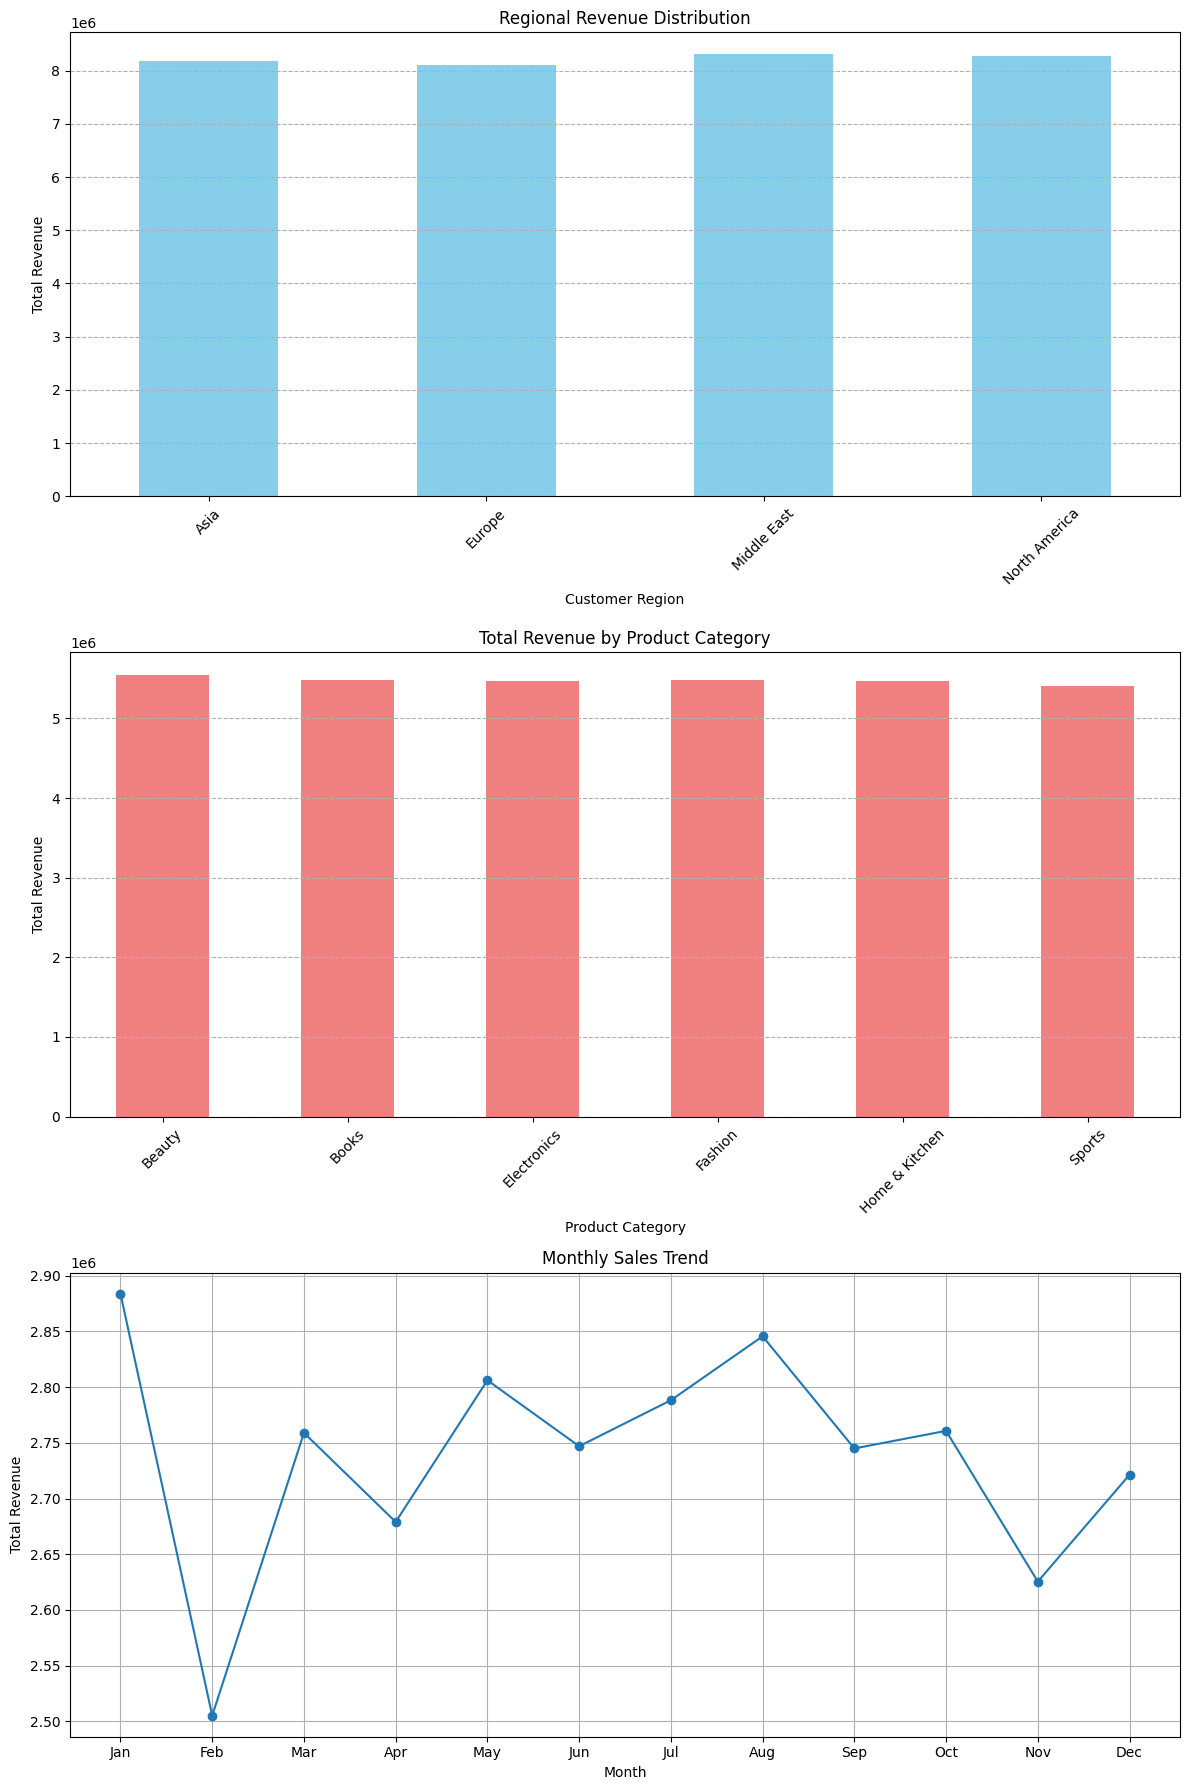

In [13]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18)) # 3 rows, 1 column, adjusted figure size

# Plot for Regional Revenue Distribution (First Subplot)
region_revenue.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Regional Revenue Distribution')
axes[0].set_xlabel('Customer Region')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--')

# Plot for Total Revenue by Product Category (Second Subplot)
category_revenue.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Total Revenue by Product Category')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')

# Plot for Monthly Sales Trend (Third Subplot)
monthly_revenue.plot(kind='line', marker='o', ax=axes[2])
axes[2].set_title('Monthly Sales Trend')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Revenue')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2].grid(True)

# Adjust layout to prevent overlaps and display the plot
plt.tight_layout()
plt.show()

## Dashboard Insights

Based on the generated dashboard visualizations, here are the key insights:

*   **Regional Revenue Distribution:** The Middle East region generates the highest revenue, closely followed by North America. Asia and Europe also contribute significantly, with relatively balanced revenue across all four regions.

*   **Total Revenue by Product Category:** 'Beauty' is the leading product category in terms of total revenue, closely followed by 'Books', 'Fashion', and 'Electronics'. 'Home & Kitchen' and 'Sports' also show strong performance, indicating a diverse and well-distributed sales portfolio across categories.

*   **Monthly Sales Trend:** The monthly sales trend shows fluctuations throughout the year. Sales appear to be relatively consistent, with no extreme peaks or troughs. There might be slight dips in certain months (e.g., February, November) and slight increases in others (e.g., January, May, August), suggesting some seasonality or promotional impacts. Further analysis would be needed to pinpoint specific seasonal patterns or event-driven sales variations.

## Final Task

### Subtask:
Present the completed sales dashboard with all the key visualizations and a concise summary of the insights.


## Summary:

### Data Analysis Key Findings

*   **Regional Revenue Distribution**: The Middle East region generates the highest revenue, closely followed by North America. Asia and Europe also contribute significantly, showing relatively balanced revenue across all four regions.
*   **Total Revenue by Product Category**: 'Beauty' is the leading product category in terms of total revenue, followed closely by 'Books', 'Fashion', and 'Electronics'. 'Home & Kitchen' and 'Sports' also demonstrate strong performance, indicating a diverse sales portfolio.
*   **Monthly Sales Trend**: Monthly sales show fluctuations throughout the year without extreme peaks or troughs. Slight dips are observed in certain months (e.g., February, November), and slight increases in others (e.g., January, May, August), suggesting potential seasonality or promotional influences.

### Insights or Next Steps

*   Further analysis is recommended to investigate the specific causes of monthly sales fluctuations, such as seasonal patterns, marketing campaigns, or external events, to optimize sales forecasting and promotional strategies.
*   Given the strong performance of 'Beauty' and the diverse revenue across other categories, Amazon could explore cross-promotional opportunities or bundle products from top-performing categories to further boost sales.


Data Analysis by Viraj Raje